In [12]:
import pandas as pd

file_path = "Epl2425.xlsx"

# Load the Excel file
excel_file = pd.ExcelFile(file_path)

# Get the list of sheet names
sheet_names = excel_file.sheet_names

# Print the sheet names
print("Sheet names:", sheet_names)

Sheet names: ['Premier League', 'LeagueTableExport', 'AllFixturesExport', 'PlayerStatsExport', 'TeamStatsExport', 'LineUpExport', 'PlaysExport']


In [14]:
# 3. Memilih salah satu sheet, misalnya sheet bernama "Sheet1"
df = pd.read_excel(file_path, sheet_name="TeamStatsExport")
df

,Team,Date Time (US Eastern),Fixture,Home Team,Home Goal,Away Goal,Away Team,homeAway,foulsCommitted,yellowCards,...,totalLongBalls,longballPct,blockedShots,effectiveTackles,totalTackles,tacklePct,interceptions,effectiveClearance,totalClearance,updateTime
0,Manchester United,2024-08-16 15:00:00,Manchester United vs Fulham,Manchester United,1,0,Fulham,home,12,2,...,40,60,2,14,21,70,19,20,20,2024-08-17 08:19:03
1,Fulham,2024-08-16 15:00:00,Manchester United vs Fulham,Manchester United,1,0,Fulham,away,10,3,...,39,40,4,17,24,70,9,19,19,2024-08-17 08:19:03
2,Ipswich Town,2024-08-17 07:30:00,Ipswich Town vs Liverpool,Ipswich Town,0,2,Liverpool,home,9,3,...,47,40,3,10,20,50,9,28,28,2024-08-18 04:18:18
3,Liverpool,2024-08-17 07:30:00,Ipswich Town vs Liverpool,Ipswich Town,0,2,Liverpool,away,18,1,...,56,50,7,4,9,40,5,16,16,2024-08-18 04:18:18
4,Nottingham Forest,2024-08-17 10:00:00,Nottingham Forest vs AFC Bournemouth,Nottingham Forest,1,1,AFC Bournemouth,home,17,1,...,51,40,3,12,24,50,7,25,25,2024-08-18 04:18:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,West Ham United,2025-05-25 11:00:00,Ipswich Town vs West Ham United,Ipswich Town,1,3,West Ham United,away,9,1,...,58,40,3,11,25,40,9,34,34,2025-05-26 04:26:29
756,Fulham,2025-05-25 11:00:00,Fulham vs Manchester City,Fulham,0,2,Manchester City,home,11,0,...,59,50,4,8,18,40,11,29,29,2025-05-25 22:23:49
757,Manchester City,2025-05-25 11:00:00,Fulham vs Manchester City,Fulham,0,2,Manchester City,away,5,0,...,60,60,8,9,14,60,13,14,14,2025-05-25 22:23:49
758,AFC Bournemouth,2025-05-25 11:00:00,AFC Bournemouth vs Leicester City,AFC Bournemouth,2,0,Leicester City,home,19,0,...,48,30,6,9,15,60,7,11,11,2025-05-26 04:26:28


In [22]:
# informasi dimensi
df.shape

(760, 37)

In [24]:
# informasi fitur
df.columns.tolist()

['Team',
 'Date Time (US Eastern)',
 'Fixture',
 'Home Team',
 'Home Goal',
 'Away Goal',
 'Away Team',
 'homeAway',
 'foulsCommitted',
 'yellowCards',
 'redCards',
 'offsides',
 'wonCorners',
 'saves',
 'possessionPct',
 'totalShots',
 'shotsOnTarget',
 'shotPct',
 'penaltyKickGoals',
 'penaltyKickShots',
 'accuratePasses',
 'totalPasses',
 'passPct',
 'accurateCrosses',
 'totalCrosses',
 'crossPct',
 'accurateLongBalls',
 'totalLongBalls',
 'longballPct',
 'blockedShots',
 'effectiveTackles',
 'totalTackles',
 'tacklePct',
 'interceptions',
 'effectiveClearance',
 'totalClearance',
 'updateTime']

In [26]:
# Ringkasan tipe data dan jumlah non-null
print("\nInfo dataset:")
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Team                    760 non-null    object        
 1   Date Time (US Eastern)  760 non-null    datetime64[ns]
 2   Fixture                 760 non-null    object        
 3   Home Team               760 non-null    object        
 4   Home Goal               760 non-null    int64         
 5   Away Goal               760 non-null    int64         
 6   Away Team               760 non-null    object        
 7   homeAway                760 non-null    object        
 8   foulsCommitted          760 non-null    int64         
 9   yellowCards             760 non-null    int64         
 10  redCards                760 non-null    int64         
 11  offsides                760 non-null    int64         
 12  wonCorners              760 non-nul

In [28]:
#cek jumlah game
df['Home Team'].value_counts()
df['Away Team'].value_counts()

Away Team
Fulham                     38
Liverpool                  38
Newcastle United           38
Chelsea                    38
Arsenal                    38
West Ham United            38
Leicester City             38
Ipswich Town               38
Nottingham Forest          38
Everton                    38
Manchester United          38
Tottenham Hotspur          38
Manchester City            38
Crystal Palace             38
Aston Villa                38
Wolverhampton Wanderers    38
Brighton & Hove Albion     38
Southampton                38
AFC Bournemouth            38
Brentford                  38
Name: count, dtype: int64

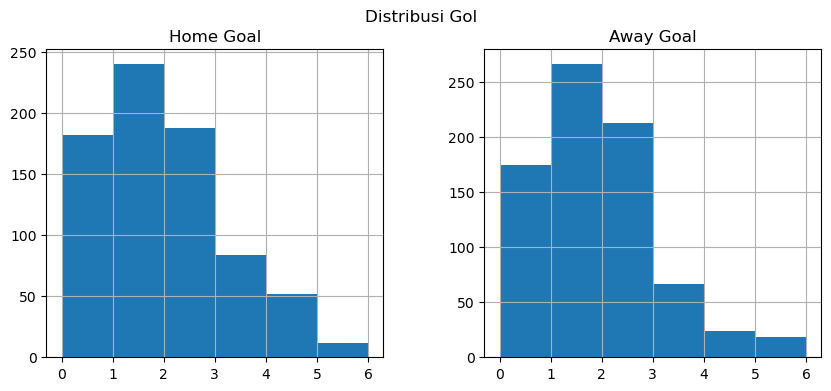

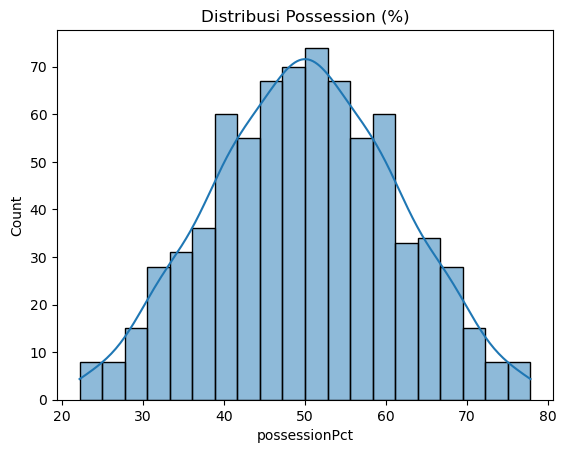

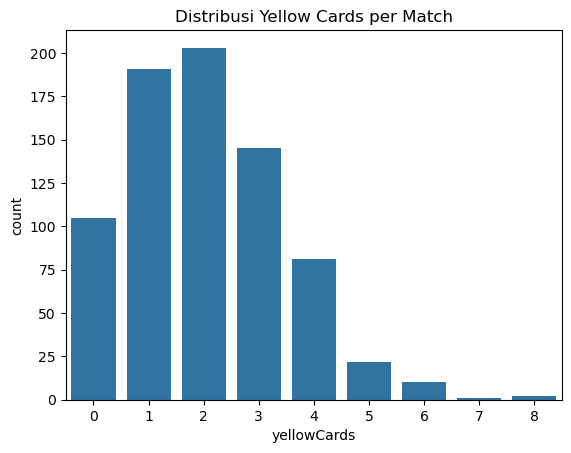

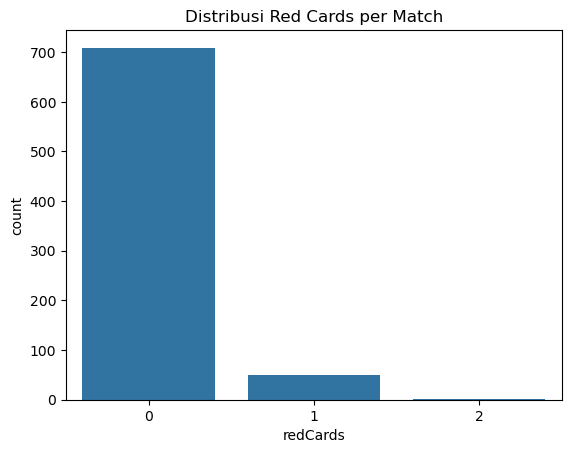

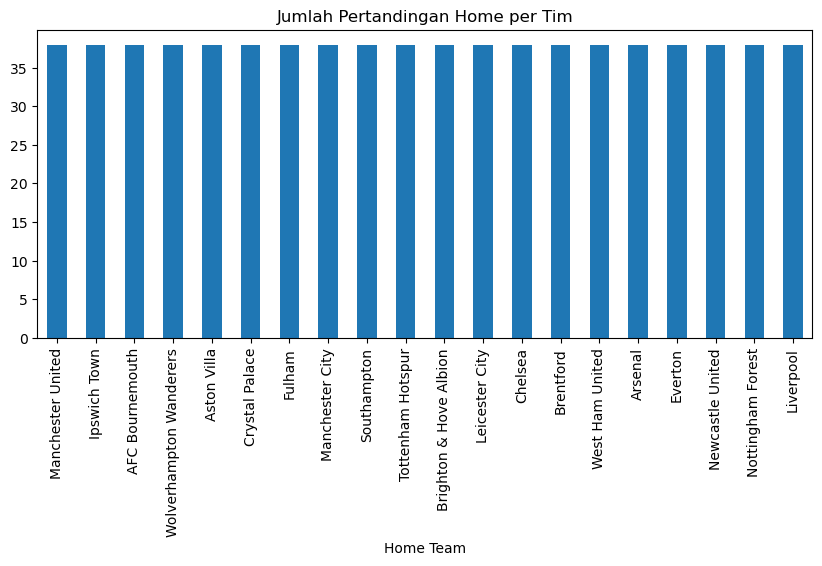

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribusi gol
df[['Home Goal','Away Goal']].hist(bins=range(0,7), figsize=(10,4))
plt.suptitle("Distribusi Gol")
plt.show()

# Distribusi possession
sns.histplot(df['possessionPct'], bins=20, kde=True)
plt.title("Distribusi Possession (%)")
plt.show()

# Distribusi kartu
sns.countplot(x='yellowCards', data=df)
plt.title("Distribusi Yellow Cards per Match")
plt.show()

sns.countplot(x='redCards', data=df)
plt.title("Distribusi Red Cards per Match")
plt.show()

# Jumlah pertandingan per tim (home)
df['Home Team'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Jumlah Pertandingan Home per Tim")
plt.show()

match_result
Home Win    310
Away Win    264
Draw        186
Name: count, dtype: int64


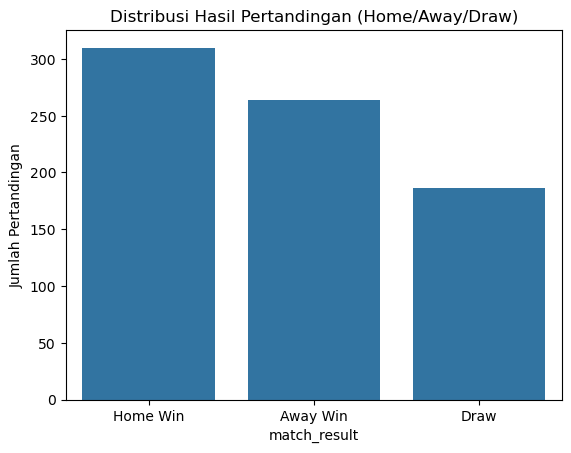

In [42]:
# Buat kolom hasil pertandingan
def get_result(row):
    if row['Home Goal'] > row['Away Goal']:
        return "Home Win"
    elif row['Home Goal'] < row['Away Goal']:
        return "Away Win"
    else:
        return "Draw"

df['match_result'] = df.apply(get_result, axis=1)

# Hitung distribusi
print(df['match_result'].value_counts())

# Visualisasi
sns.countplot(x='match_result', data=df, order=['Home Win','Away Win','Draw'])
plt.title("Distribusi Hasil Pertandingan (Home/Away/Draw)")
plt.ylabel("Jumlah Pertandingan")
plt.show()


In [44]:
# Buat list untuk menampung hasil tiap tim
records = []

for _, row in df.iterrows():
    home_team = row['Home Team']
    away_team = row['Away Team']
    hg, ag = row['Home Goal'], row['Away Goal']
    
    # Tentukan hasil pertandingan
    if hg > ag:  # Home menang
        records.append([home_team, "Win"])
        records.append([away_team, "Loss"])
    elif hg < ag:  # Away menang
        records.append([home_team, "Loss"])
        records.append([away_team, "Win"])
    else:  # Seri
        records.append([home_team, "Draw"])
        records.append([away_team, "Draw"])

# Ubah ke DataFrame
results_df = pd.DataFrame(records, columns=['Team','Result'])

# Hitung distribusi W/D/L per tim
w_d_l = results_df.groupby(['Team','Result']).size().unstack(fill_value=0)

print(w_d_l)

Result                   Draw  Loss  Win
Team                                    
AFC Bournemouth            22    24   30
Arsenal                    28     8   40
Aston Villa                18    20   38
Brentford                  16    28   32
Brighton & Hove Albion     26    18   32
Chelsea                    18    18   40
Crystal Palace             28    22   26
Everton                    30    24   22
Fulham                     18    28   30
Ipswich Town               20    48    8
Leicester City             14    50   12
Liverpool                  18     8   50
Manchester City            16    18   42
Manchester United          18    36   22
Newcastle United           12    24   40
Nottingham Forest          16    22   38
Southampton                12    60    4
Tottenham Hotspur          10    44   22
West Ham United            20    34   22
Wolverhampton Wanderers    12    40   24


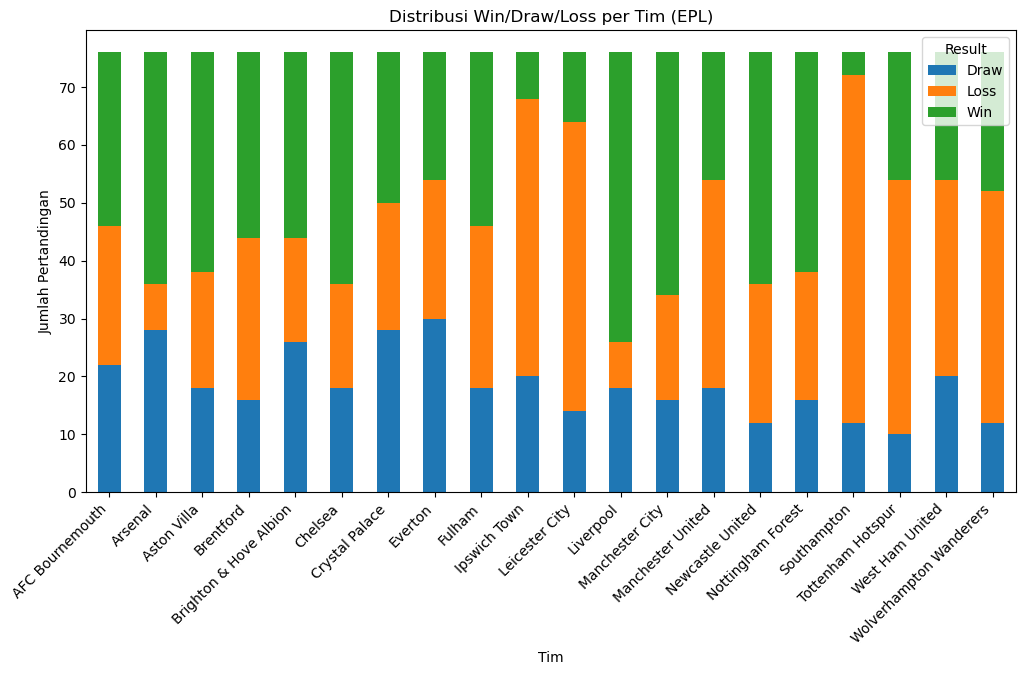

In [46]:
w_d_l.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Distribusi Win/Draw/Loss per Tim (EPL)")
plt.ylabel("Jumlah Pertandingan")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()

Team
Liverpool                  168
Arsenal                    148
Manchester City            142
Chelsea                    138
Newcastle United           132
Aston Villa                132
Nottingham Forest          130
Brighton & Hove Albion     122
AFC Bournemouth            112
Brentford                  112
Fulham                     108
Crystal Palace             106
Everton                     96
West Ham United             86
Wolverhampton Wanderers     84
Manchester United           84
Tottenham Hotspur           76
Leicester City              50
Ipswich Town                44
Southampton                 24
Name: Points, dtype: int64


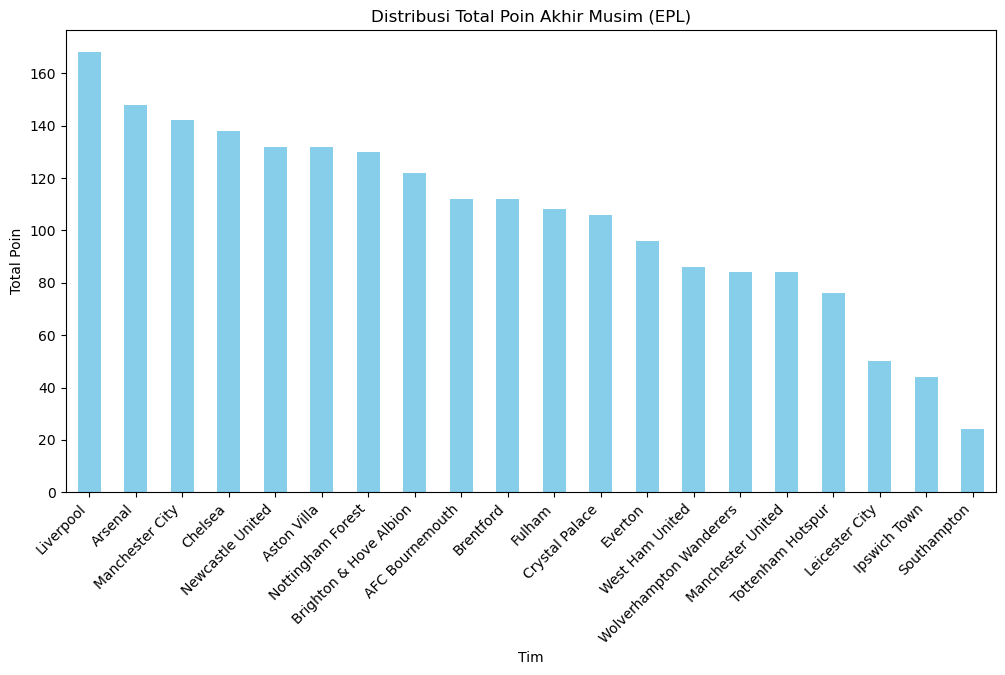

In [48]:
# Tambahkan poin sesuai hasil
results_df['Points'] = results_df['Result'].map({'Win': 3, 'Draw': 1, 'Loss': 0})

# Hitung total poin per tim
points_per_team = results_df.groupby('Team')['Points'].sum().sort_values(ascending=False)

print(points_per_team)

points_per_team.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Distribusi Total Poin Akhir Musim (EPL)")
plt.ylabel("Total Poin")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()


                         penaltyKickShots  penaltyKickGoals  penaltyAccuracy
Team                                                                        
AFC Bournemouth                         7                 6        85.714286
Arsenal                                 2                 2       100.000000
Aston Villa                             6                 3        50.000000
Brentford                               6                 5        83.333333
Brighton & Hove Albion                  7                 7       100.000000
Chelsea                                 5                 4        80.000000
Crystal Palace                          4                 3        75.000000
Everton                                 2                 2       100.000000
Fulham                                  4                 3        75.000000
Ipswich Town                            2                 2       100.000000
Leicester City                          3                 2        66.666667

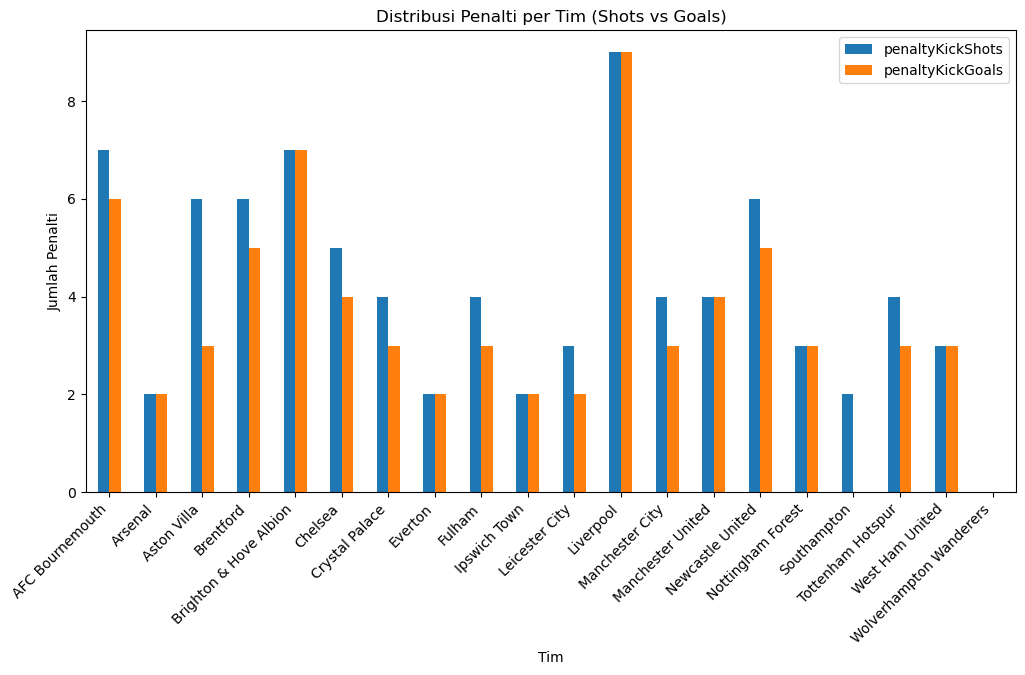

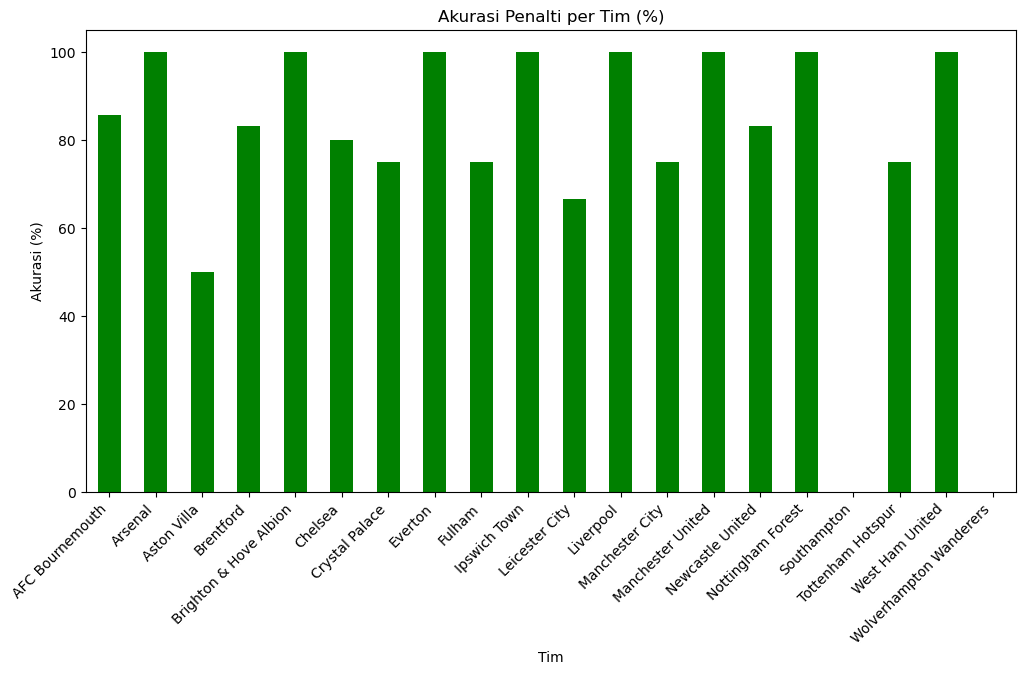

In [50]:
# Hitung penalti per tim (pakai kolom 'Team' dari sheet)
penalty_stats = df.groupby('Team')[['penaltyKickShots','penaltyKickGoals']].sum()

# Tambahkan kolom akurasi
penalty_stats['penaltyAccuracy'] = (penalty_stats['penaltyKickGoals'] / penalty_stats['penaltyKickShots']) * 100

print(penalty_stats)

# Visualisasi jumlah penalti (shots vs goals)
penalty_stats[['penaltyKickShots','penaltyKickGoals']].plot(
    kind='bar', figsize=(12,6)
)
plt.title("Distribusi Penalti per Tim (Shots vs Goals)")
plt.ylabel("Jumlah Penalti")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualisasi akurasi
penalty_stats['penaltyAccuracy'].plot(
    kind='bar', figsize=(12,6), color='green'
)
plt.title("Akurasi Penalti per Tim (%)")
plt.ylabel("Akurasi (%)")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()

Team
Manchester City            61.586842
Liverpool                  57.921053
Chelsea                    57.202632
Arsenal                    56.960526
Tottenham Hotspur          54.818421
Manchester United          53.565789
Brighton & Hove Albion     52.568421
Fulham                     52.289474
Newcastle United           51.184211
Aston Villa                50.600000
Southampton                48.663158
AFC Bournemouth            48.607895
West Ham United            48.560526
Wolverhampton Wanderers    48.084211
Brentford                  47.757895
Leicester City             45.310526
Crystal Palace             42.571053
Nottingham Forest          40.823684
Everton                    40.578947
Ipswich Town               40.344737
Name: possessionPct, dtype: float64


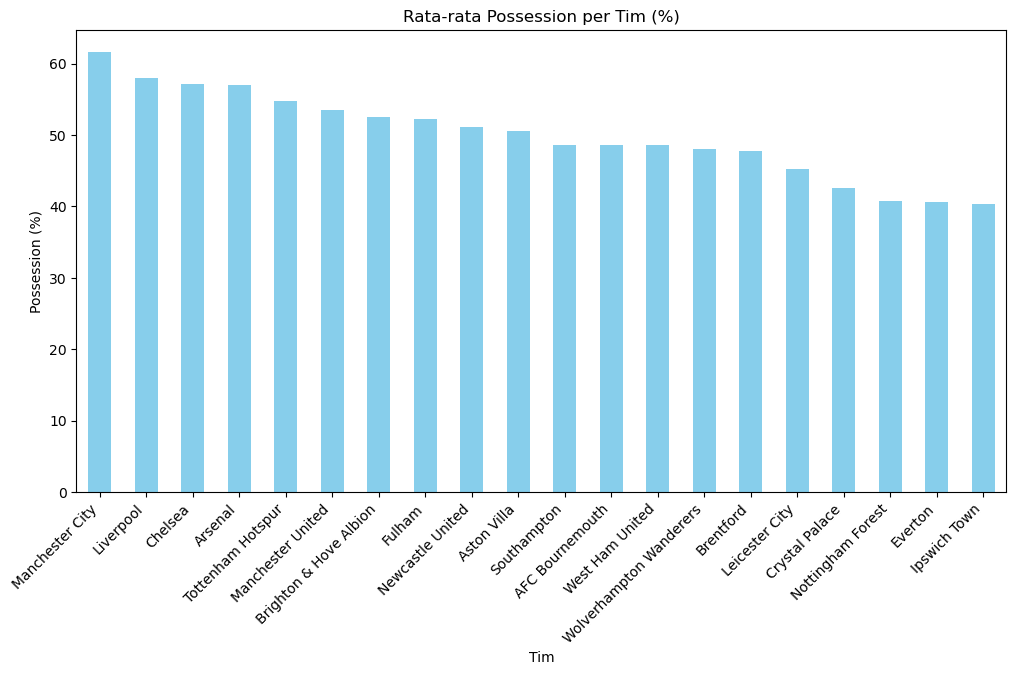

In [52]:
# Hitung rata-rata possession
possession_stats = df.groupby('Team')['possessionPct'].mean().sort_values(ascending=False)

print(possession_stats)

# Visualisasi
possession_stats.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Rata-rata Possession per Tim (%)")
plt.ylabel("Possession (%)")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()

Team
Manchester City            89.736842
Chelsea                    87.368421
Arsenal                    86.578947
Liverpool                  86.315789
Southampton                85.789474
Brighton & Hove Albion     85.526316
Tottenham Hotspur          84.736842
Fulham                     84.736842
Aston Villa                83.684211
Manchester United          83.684211
West Ham United            82.894737
Newcastle United           82.631579
Wolverhampton Wanderers    81.578947
Brentford                  80.789474
Leicester City             80.263158
AFC Bournemouth            80.000000
Ipswich Town               79.736842
Everton                    77.631579
Nottingham Forest          77.368421
Crystal Palace             76.052632
Name: passPct, dtype: float64


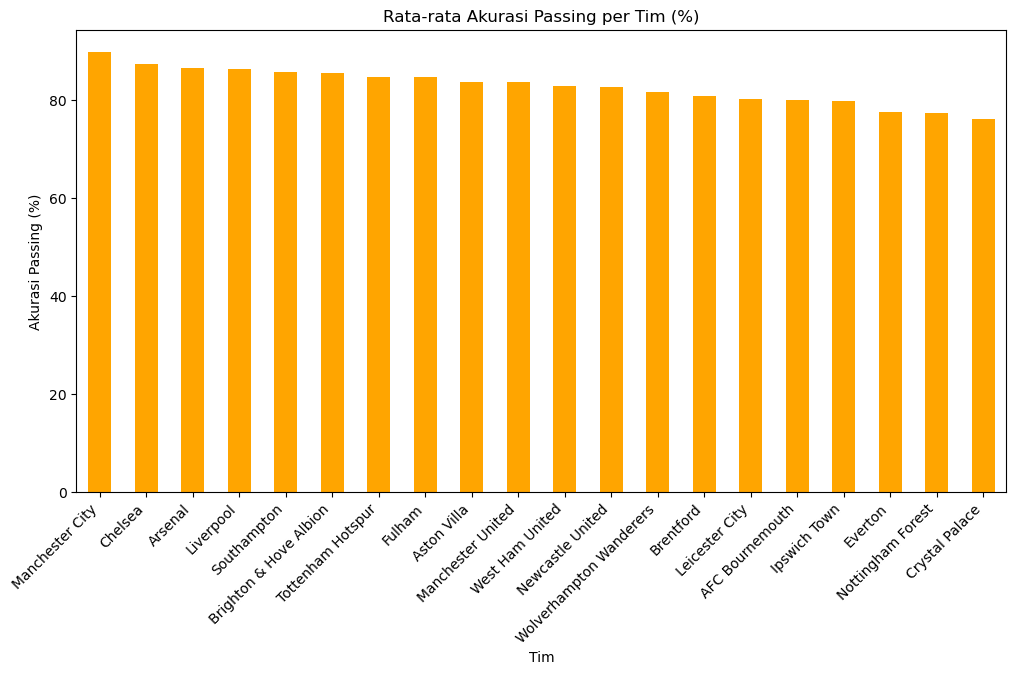

In [54]:
# Hitung rata-rata akurasi passing
pass_stats = df.groupby('Team')['passPct'].mean().sort_values(ascending=False)

print(pass_stats)

# Visualisasi
pass_stats.plot(kind='bar', figsize=(12,6), color='orange')
plt.title("Rata-rata Akurasi Passing per Tim (%)")
plt.ylabel("Akurasi Passing (%)")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()

Team
Nottingham Forest          31.131579
Ipswich Town               28.131579
Everton                    27.657895
Crystal Palace             27.394737
Brentford                  26.421053
West Ham United            26.263158
AFC Bournemouth            25.947368
Leicester City             25.105263
Southampton                25.078947
Wolverhampton Wanderers    23.736842
Fulham                     23.342105
Newcastle United           21.736842
Tottenham Hotspur          20.421053
Brighton & Hove Albion     19.684211
Aston Villa                19.157895
Manchester United          19.078947
Liverpool                  18.236842
Chelsea                    17.210526
Arsenal                    17.000000
Manchester City            15.447368
Name: totalClearance, dtype: float64


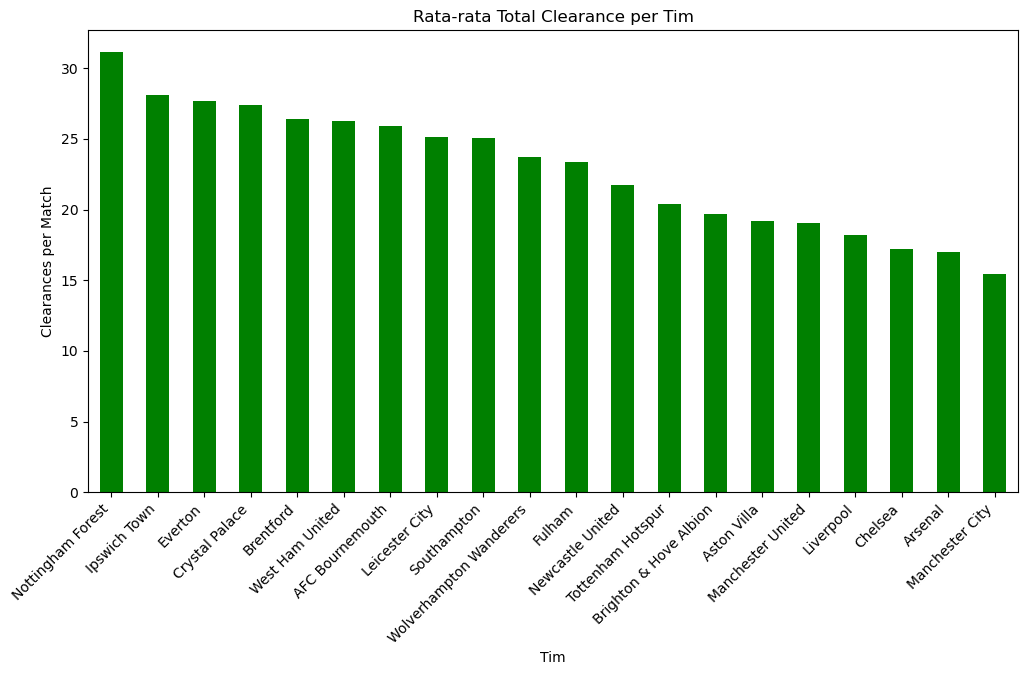

In [56]:
# Hitung rata-rata clearance
clearance_stats = df.groupby('Team')['totalClearance'].mean().sort_values(ascending=False)

print(clearance_stats)

# Visualisasi
clearance_stats.plot(kind='bar', figsize=(12,6), color='green')
plt.title("Rata-rata Total Clearance per Tim")
plt.ylabel("Clearances per Match")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()


                         GoalsFor  GoalsAgainst
Home Team                                      
Liverpool                      86            41
Manchester City                72            44
Arsenal                        69            34
Newcastle United               68            47
Brentford                      66            57
Brighton & Hove Albion         66            59
Chelsea                        64            43
Tottenham Hotspur              64            65
AFC Bournemouth                58            46
Aston Villa                    58            51
Nottingham Forest              58            46
Wolverhampton Wanderers        54            69
Fulham                         54            54
Crystal Palace                 51            51
West Ham United                46            62
Manchester United              44            54
Everton                        42            44
Ipswich Town                   36            82
Leicester City                 33       

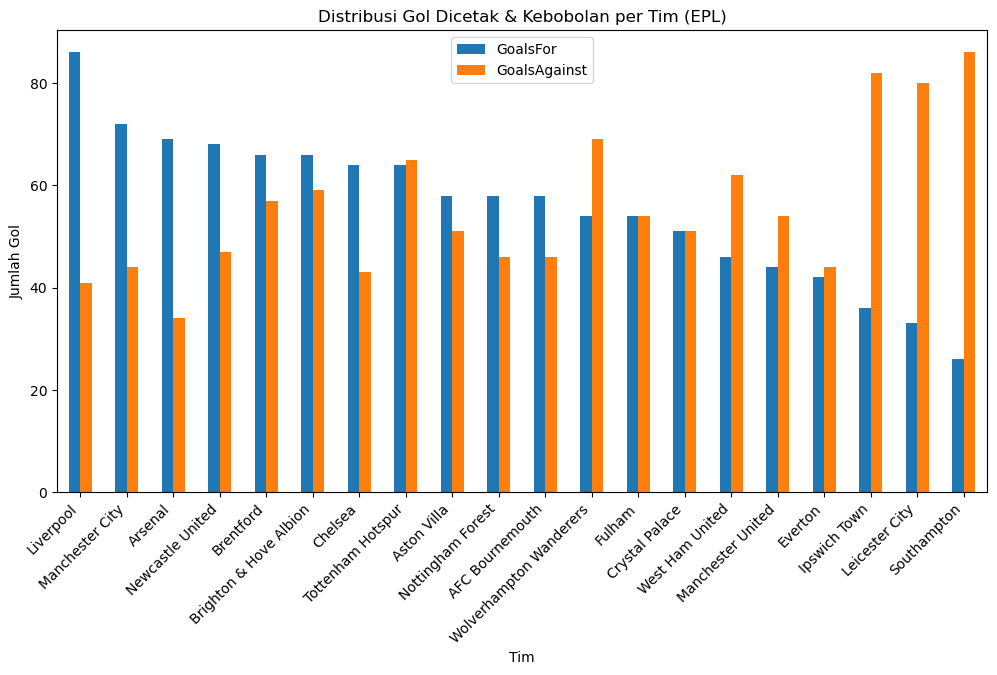

In [70]:
# Gol dicetak (Goals For)
gf_home = df.groupby('Home Team')['Home Goal'].sum()
gf_away = df.groupby('Away Team')['Away Goal'].sum()
gf = gf_home.add(gf_away, fill_value=0)

# Gol kebobolan (Goals Against)
ga_home = df.groupby('Home Team')['Away Goal'].sum()
ga_away = df.groupby('Away Team')['Home Goal'].sum()
ga = ga_home.add(ga_away, fill_value=0)

# Gabungkan
goal_stats = pd.DataFrame({
    'GoalsFor': gf/2,
    'GoalsAgainst': ga/2
}).astype(int).sort_values('GoalsFor', ascending=False)

print(goal_stats)

goal_stats.sort_values('GoalsFor', ascending=False)[['GoalsFor','GoalsAgainst']].plot(
    kind='bar', figsize=(12,6)
)
plt.title("Distribusi Gol Dicetak & Kebobolan per Tim (EPL)")
plt.ylabel("Jumlah Gol")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()

Home Team
Brentford                  28.789474
AFC Bournemouth            28.157895
Newcastle United           28.105263
Chelsea                    27.789474
Southampton                27.526316
Tottenham Hotspur          27.473684
Crystal Palace             26.368421
West Ham United            26.105263
Liverpool                  26.052632
Brighton & Hove Albion     26.052632
Aston Villa                25.578947
Leicester City             25.421053
Ipswich Town               25.421053
Manchester United          25.263158
Nottingham Forest          24.947368
Fulham                     24.842105
Manchester City            24.789474
Arsenal                    24.368421
Wolverhampton Wanderers    23.105263
Everton                    22.210526
Name: totalShots, dtype: float64


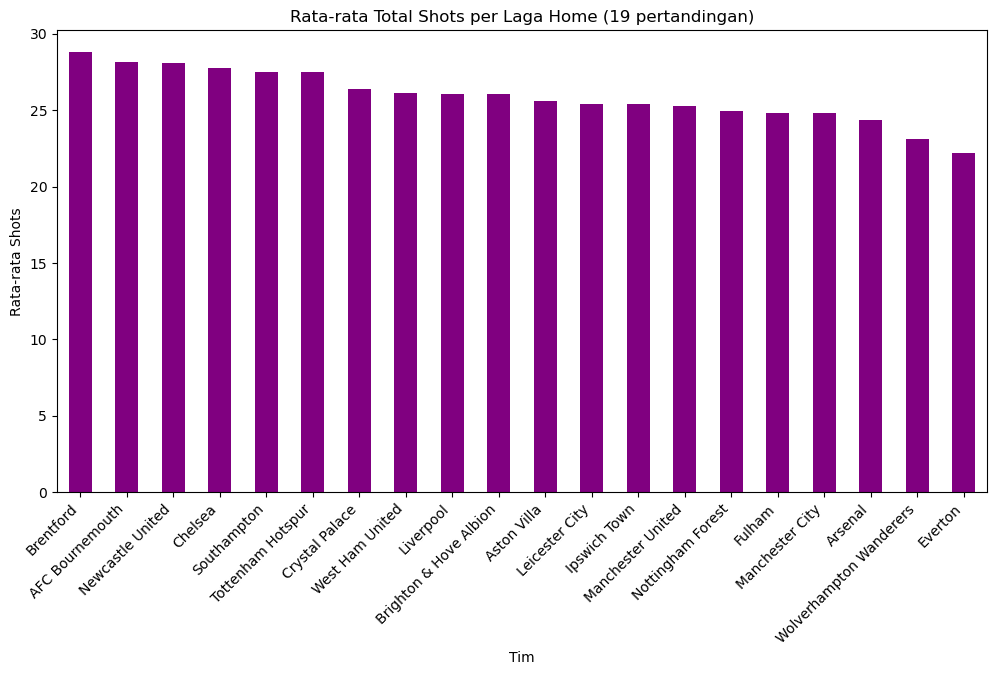

In [82]:
import matplotlib.pyplot as plt

# Total shots saat main home
home_shots = df.groupby('Home Team')['totalShots'].sum()

# Rata-rata per 19 laga home
home_shots_avg = home_shots / 19

print(home_shots_avg.sort_values(ascending=False))

# Visualisasi
home_shots_avg.sort_values(ascending=False).plot(
    kind='bar', figsize=(12,6), color='purple'
)
plt.title("Rata-rata Total Shots per Laga Home (19 pertandingan)")
plt.ylabel("Rata-rata Shots")
plt.xlabel("Tim")
plt.xticks(rotation=45, ha='right')
plt.show()


In [84]:
team_name = "Manchester United"

# Shots saat jadi home team
shots_home = df.loc[df['Home Team'] == team_name, 'totalShots'].sum()

# Shots saat jadi away team
shots_away = df.loc[df['Away Team'] == team_name, 'totalShots'].sum()

# Total shots semusim
total_shots = shots_home + shots_away

print(f"Total shots {team_name}: {total_shots}")


Total shots Manchester United: 942


Team
Tottenham Hotspur          199
Chelsea                    199
Southampton                198
Brentford                  197
Newcastle United           180
Fulham                     175
Ipswich Town               174
AFC Bournemouth            173
Liverpool                  172
Crystal Palace             171
Manchester City            169
Aston Villa                169
Wolverhampton Wanderers    167
Brighton & Hove Albion     166
West Ham United            166
Manchester United          162
Nottingham Forest          159
Everton                    158
Arsenal                    153
Leicester City             153
Name: shotsOnTarget, dtype: int64


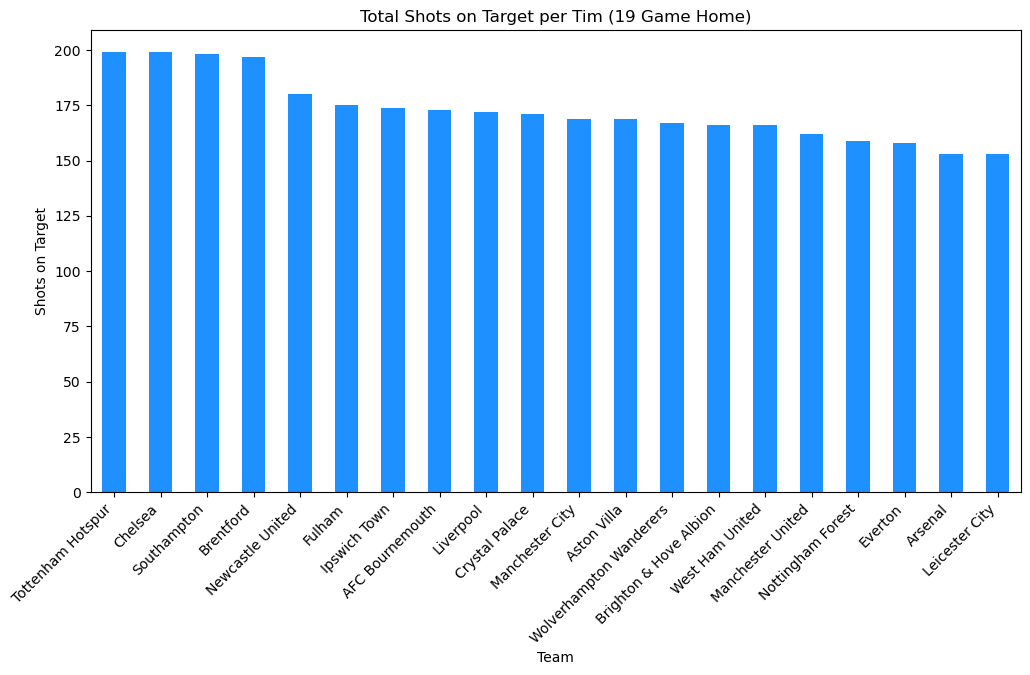

In [88]:
# Total shots on target tiap tim saat main home (19 laga home)
shots_home = df.groupby('Home Team')['shotsOnTarget'].sum().sort_values(ascending=False)

# Ubah nama index biar rapi
shots_home.index.name = 'Team'

print(shots_home)

# Visualisasi
import matplotlib.pyplot as plt

shots_home.plot(kind='bar', figsize=(12,6), color='dodgerblue')
plt.title("Total Shots on Target per Tim (19 Game Home)")
plt.ylabel("Shots on Target")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.show()


In [90]:
df[['Home Team','Away Team','Home Goal','Away Goal','shotsOnTarget']].head(10)


,Home Team,Away Team,Home Goal,Away Goal,shotsOnTarget
0,Manchester United,Fulham,1,0,5
1,Manchester United,Fulham,1,0,2
2,Ipswich Town,Liverpool,0,2,2
3,Ipswich Town,Liverpool,0,2,5
4,Nottingham Forest,AFC Bournemouth,1,1,8
5,Nottingham Forest,AFC Bournemouth,1,1,4
6,Newcastle United,Southampton,1,0,1
7,Newcastle United,Southampton,1,0,4
8,Everton,Brighton & Hove Albion,0,3,1
9,Everton,Brighton & Hove Albion,0,3,5


In [92]:
# distribusi total shots on target saat home
shots_home = df[df['homeAway'] == 'home'].groupby('Team')['shotsOnTarget'].sum()

# distribusi total shots on target saat away
shots_away = df[df['homeAway'] == 'away'].groupby('Team')['shotsOnTarget'].sum()

# rata-rata per laga (19 home, 19 away di EPL)
shots_home_avg = (shots_home / 19).round(2)
shots_away_avg = (shots_away / 19).round(2)

# gabung ke 1 tabel
import pandas as pd
shots_summary = pd.DataFrame({
    "Home Total SoT": shots_home,
    "Home Avg SoT": shots_home_avg,
    "Away Total SoT": shots_away,
    "Away Avg SoT": shots_away_avg
})

print(shots_summary)


                         Home Total SoT  Home Avg SoT  Away Total SoT  \
Team                                                                    
AFC Bournemouth                     104          5.47              98   
Arsenal                             105          5.53              83   
Aston Villa                         106          5.58              64   
Brentford                           105          5.53              79   
Brighton & Hove Albion               97          5.11              94   
Chelsea                             127          6.68              91   
Crystal Palace                       92          4.84              94   
Everton                              78          4.11              66   
Fulham                               93          4.89              80   
Ipswich Town                         68          3.58              59   
Leicester City                       55          2.89              56   
Liverpool                           112          5.

<Figure size 1400x700 with 0 Axes>

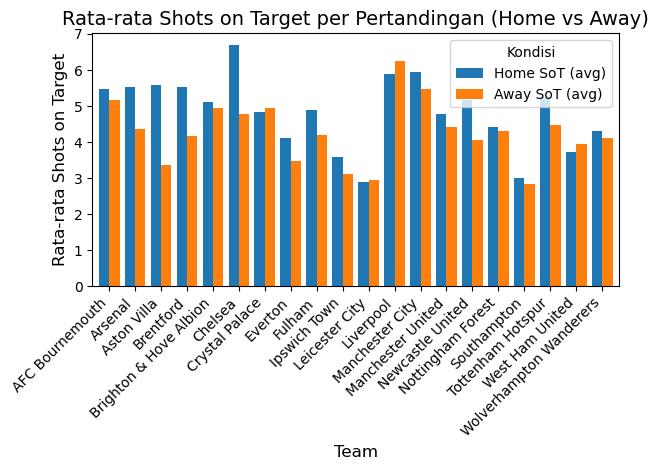

In [94]:
# Hitung total SoT per tim saat home & away
shots_home = df[df['homeAway'] == 'home'].groupby('Team')['shotsOnTarget'].mean()
shots_away = df[df['homeAway'] == 'away'].groupby('Team')['shotsOnTarget'].mean()

# Gabungkan ke dataframe
shots_summary = pd.DataFrame({
    'Home SoT (avg)': shots_home,
    'Away SoT (avg)': shots_away
}).sort_index()

# Plot
plt.figure(figsize=(14,7))
shots_summary.plot(kind='bar', width=0.8)
plt.title('Rata-rata Shots on Target per Pertandingan (Home vs Away)', fontsize=14)
plt.ylabel('Rata-rata Shots on Target', fontsize=12)
plt.xlabel('Team', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kondisi', fontsize=10)
plt.tight_layout()
plt.show()


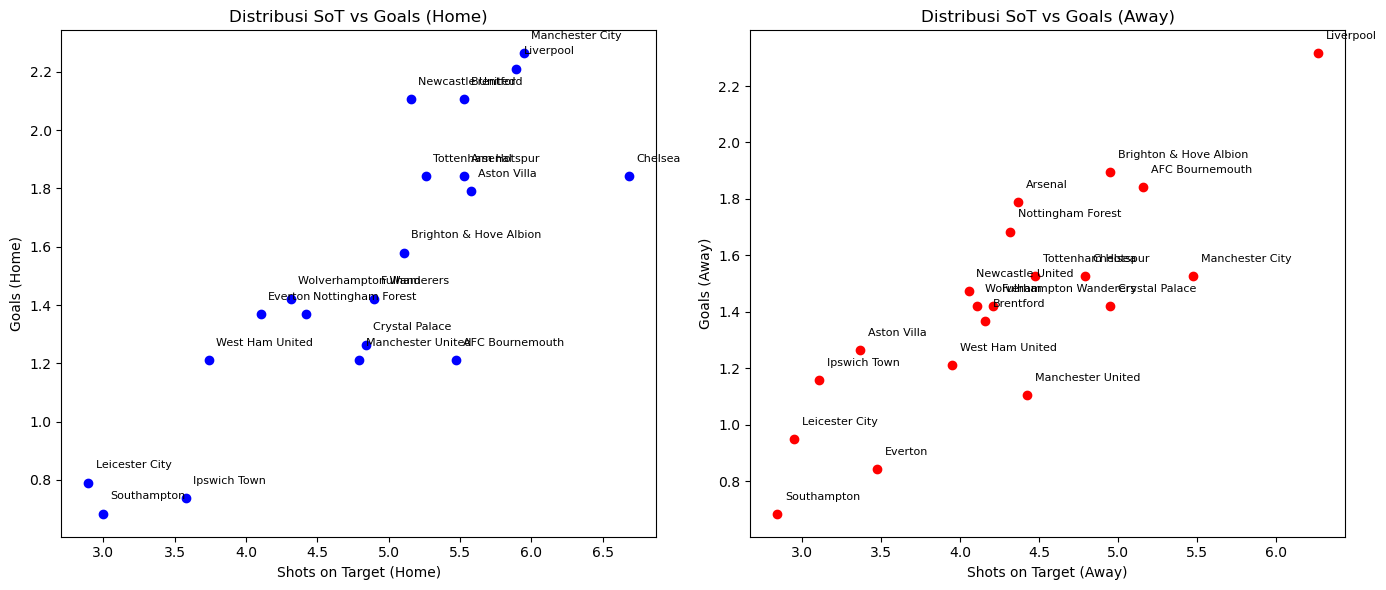

In [96]:
# Hitung rata-rata SoT & Goal saat Home
home_stats = df[df['homeAway'] == 'home'].groupby('Team').agg({
    'shotsOnTarget': 'mean',
    'Home Goal': 'mean'
}).rename(columns={'shotsOnTarget': 'SoT Home', 'Home Goal': 'Goals Home'})

# Hitung rata-rata SoT & Goal saat Away
away_stats = df[df['homeAway'] == 'away'].groupby('Team').agg({
    'shotsOnTarget': 'mean',
    'Away Goal': 'mean'
}).rename(columns={'shotsOnTarget': 'SoT Away', 'Away Goal': 'Goals Away'})

# Gabungkan
stats = home_stats.join(away_stats)

# Plot scatter: SoT vs Goals untuk Home
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(stats['SoT Home'], stats['Goals Home'], color='blue')
for team in stats.index:
    plt.text(stats.loc[team,'SoT Home']+0.05, stats.loc[team,'Goals Home']+0.05, team, fontsize=8)
plt.xlabel("Shots on Target (Home)")
plt.ylabel("Goals (Home)")
plt.title("Distribusi SoT vs Goals (Home)")

# Plot scatter: SoT vs Goals untuk Away
plt.subplot(1,2,2)
plt.scatter(stats['SoT Away'], stats['Goals Away'], color='red')
for team in stats.index:
    plt.text(stats.loc[team,'SoT Away']+0.05, stats.loc[team,'Goals Away']+0.05, team, fontsize=8)
plt.xlabel("Shots on Target (Away)")
plt.ylabel("Goals (Away)")
plt.title("Distribusi SoT vs Goals (Away)")

plt.tight_layout()
plt.show()

In [98]:
# Hitung total SoT dan Goals ketika Home
home_stats = df[df['homeAway'] == 'home'].groupby('Team').agg({
    'shotsOnTarget': 'sum',
    'Home Goal': 'sum'
}).rename(columns={'shotsOnTarget': 'SoT Home', 'Home Goal': 'Goals Home'})

# Hitung total SoT dan Goals ketika Away
away_stats = df[df['homeAway'] == 'away'].groupby('Team').agg({
    'shotsOnTarget': 'sum',
    'Away Goal': 'sum'
}).rename(columns={'shotsOnTarget': 'SoT Away', 'Away Goal': 'Goals Away'})

# Gabungkan
stats = home_stats.join(away_stats)

# Hitung persentase konversi
stats['Conv% Home'] = (stats['Goals Home'] / stats['SoT Home'] * 100).round(2)
stats['Conv% Away'] = (stats['Goals Away'] / stats['SoT Away'] * 100).round(2)

# Hitung total (gabungan home+away)
stats['Total SoT'] = stats['SoT Home'] + stats['SoT Away']
stats['Total Goals'] = stats['Goals Home'] + stats['Goals Away']
stats['Conv% Total'] = (stats['Total Goals'] / stats['Total SoT'] * 100).round(2)

# Tampilkan hasil
stats_conv = stats[['SoT Home','Goals Home','Conv% Home',
                    'SoT Away','Goals Away','Conv% Away',
                    'Total SoT','Total Goals','Conv% Total']]


pd.set_option("display.max_rows", None)  # biar semua tim muncul
display(stats_conv)


,SoT Home,Goals Home,Conv% Home,SoT Away,Goals Away,Conv% Away,Total SoT,Total Goals,Conv% Total
Team,,,,,,,,,
AFC Bournemouth,104,23,22.12,98,35,35.71,202,58,28.71
Arsenal,105,35,33.33,83,34,40.96,188,69,36.70
Aston Villa,106,34,32.08,64,24,37.50,170,58,34.12
Brentford,105,40,38.10,79,26,32.91,184,66,35.87
Brighton & Hove Albion,97,30,30.93,94,36,38.30,191,66,34.55
Chelsea,127,35,27.56,91,29,31.87,218,64,29.36
Crystal Palace,92,24,26.09,94,27,28.72,186,51,27.42
Everton,78,26,33.33,66,16,24.24,144,42,29.17
Fulham,93,27,29.03,80,27,33.75,173,54,31.21


,SoT Home,Goals Home,Conv% Home,SoT Away,Goals Away,Conv% Away,Total SoT,Total Goals,Conv% Total
Team,,,,,,,,,
Newcastle United,98,40,40.82,77,28,36.36,175,68,38.86
Liverpool,112,42,37.50,119,44,36.97,231,86,37.23
Arsenal,105,35,33.33,83,34,40.96,188,69,36.70
Brentford,105,40,38.10,79,26,32.91,184,66,35.87
Nottingham Forest,84,26,30.95,82,32,39.02,166,58,34.94
Tottenham Hotspur,100,35,35.00,85,29,34.12,185,64,34.59
Brighton & Hove Albion,97,30,30.93,94,36,38.30,191,66,34.55
Aston Villa,106,34,32.08,64,24,37.50,170,58,34.12
Wolverhampton Wanderers,82,27,32.93,78,27,34.62,160,54,33.75


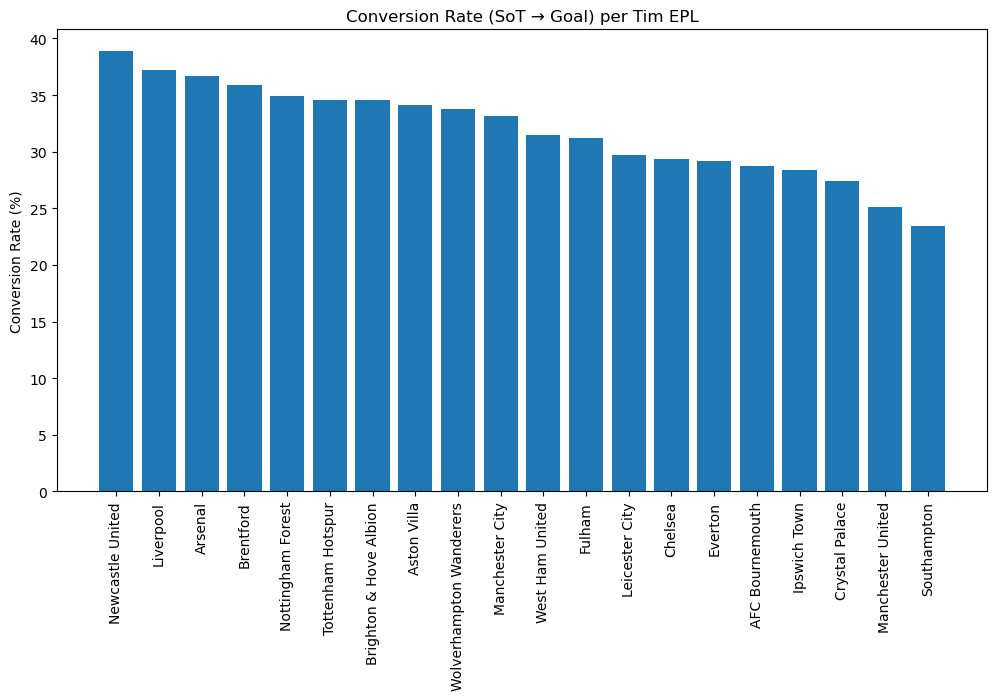

In [102]:
stats_sorted = stats_conv.sort_values(by="Conv% Total", ascending=False)

display(stats_sorted)
plt.figure(figsize=(12,6))
plt.bar(stats_sorted.index, stats_sorted["Conv% Total"])
plt.xticks(rotation=90)
plt.ylabel("Conversion Rate (%)")
plt.title("Conversion Rate (SoT → Goal) per Tim EPL")
plt.show()